In [10]:
#import key modules 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


In [11]:
#load the data
cars = pd.read_csv('./data/cars.csv')
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
#get all non-mpg columns for the features
data_x = cars[list(cars)[1:]]
#get target feature
data_y = cars['mpg']

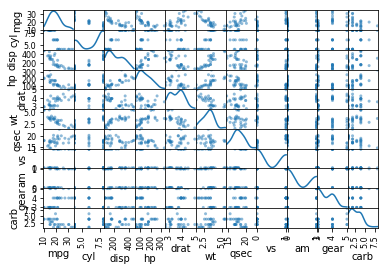

In [13]:
#do a pairs plot to see potential relationships.
sm = pd.plotting.scatter_matrix(cars, diagonal='kde')
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y,test_size = 0.2, random_state = 4)
#creates training and test sets, then freezes the RNG
#look at different feature sets to see how well they predict MPG.
feats_1 = ['hp']
feats_2 = ['hp', 'wt', 'drat']
feats_3 = ['hp','wt','cyl']
feats_4 = list(x_train)
feature_sets_to_try = [feats_1, feats_2, feats_3, feats_4]


## Make a single simple linear regression model to illustrate basic workflow

In [15]:
model = linear_model.LinearRegression()#make model object
model.fit(x_train, y_train)#fit the model (using all features, model 4)
predictions = model.predict(x_test)#build prediction on the test data

#look at actual vs predicted values:
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))

#look at loss
print('MSE, MAE, R^2, EVS: ' +str([mean_squared_error(y_test, predictions),
                                  median_absolute_error(y_test, predictions),
                                  r2_score(y_test, predictions),
                                   explained_variance_score(y_test, predictions)]))


    Actual  Predicted
20    21.5  25.161462
15    10.4   8.551049
17    32.4  25.465516
2     22.8  24.508777
11    16.4  12.012969
19    33.9  27.865780
16    14.7   7.763519
MSE, MAE, R^2, EVS: [24.51493293197121, 4.3870307737591006, 0.634381669142229, 0.7656962491586179]


In [19]:
for f in feature_sets_to_try:
    model = linear_model.LinearRegression()#make model object
    model.fit(x_train[f], y_train)#fit the model (using all features, model 4)
    predictions = model.predict(x_test[f])#build prediction on the test data
    print('MSE, MAE, R^2, EVS: ' +str(f) + ':' +str([mean_squared_error(y_test, predictions),
                                  median_absolute_error(y_test, predictions),
                                  r2_score(y_test, predictions),
                                   explained_variance_score(y_test, predictions)]))

MSE, MAE, R^2, EVS: ['hp']:[27.516685119002656, 1.5636219218266376, 0.5896132160807157, 0.6139326231772637]
MSE, MAE, R^2, EVS: ['hp', 'wt', 'drat']:[19.88407756330374, 2.6279205403576356, 0.7034467412366281, 0.8046663546598399]
MSE, MAE, R^2, EVS: ['hp', 'wt', 'cyl']:[18.816951600501145, 3.5280819067169773, 0.71936197194183, 0.7869455733337797]
MSE, MAE, R^2, EVS: ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']:[24.51493293197121, 4.3870307737591006, 0.634381669142229, 0.7656962491586179]
